In [2]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


df = pd.read_csv("dataset_manifest.csv")


In [3]:
num_classes = df['item_type'].nunique()
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['item_type'], random_state=42)


train_gen = ImageDataGenerator(rescale=1./255).flow_from_dataframe(
    train_df, x_col="image_path", y_col="item_type",
    target_size=(128, 128), batch_size=32, class_mode="categorical"
)
print(train_gen.class_indices)

Found 8627 validated image filenames belonging to 18 classes.
{'FreshApple': 0, 'FreshBanana': 1, 'FreshCarrot': 2, 'FreshCucumber': 3, 'FreshMango': 4, 'FreshOrange': 5, 'FreshPotato': 6, 'FreshStrawberry': 7, 'FreshTomato': 8, 'RottenApple': 9, 'RottenBanana': 10, 'RottenCarrot': 11, 'RottenCucumber': 12, 'RottenMango': 13, 'RottenOrange': 14, 'RottenPotato': 15, 'RottenStrawberry': 16, 'RottenTomato': 17}


In [4]:
test_gen = ImageDataGenerator(rescale=1./255).flow_from_dataframe(
    test_df, x_col="image_path", y_col="item_type",
    target_size=(128, 128), batch_size=32, class_mode="categorical", shuffle=False
)



Found 2157 validated image filenames belonging to 18 classes.


In [5]:
model = Sequential([
    Input(shape=(128, 128, 3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(num_classes, activation='softmax')
])

In [6]:
model.compile(optimizer=Adam(0.001), loss="categorical_crossentropy", metrics=["accuracy"])

In [7]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

In [9]:
model.fit(
    train_gen,
    epochs=50,
    validation_data=test_gen,
    callbacks=[early_stop]
)

loss, acc = model.evaluate(test_gen)
print(f"Test Accuracy: {acc:.4f}")
# model.save("model2.h5") LEGACY FORMAT
model.save("model4.keras")

Epoch 1/50


270/270 ━━━━━━━━━━━━━━━━━━━━ 91s 336ms/step - accuracy: 0.4107 - loss: 1.8931 - val_accuracy: 0.6036 - val_loss: 1.4183
Epoch 2/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 84s 310ms/step - accuracy: 0.5770 - loss: 1.3527 - val_accuracy: 0.6787 - val_loss: 1.0966
Epoch 3/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 83s 308ms/step - accuracy: 0.6795 - loss: 1.0218 - val_accuracy: 0.7209 - val_loss: 0.9069
Epoch 4/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 85s 314ms/step - accuracy: 0.7336 - loss: 0.8170 - val_accuracy: 0.7459 - val_loss: 0.8504
Epoch 5/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 81s 300ms/step - accuracy: 0.7763 - loss: 0.6773 - val_accuracy: 0.7585 - val_loss: 0.8102
Epoch 6/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 82s 305ms/step - accuracy: 0.8136 - loss: 0.5670 - val_accuracy: 0.7983 - val_loss: 0.7152
Epoch 7/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 84s 312ms/step - accuracy: 0.8271 - loss: 0.5115 - val_accuracy: 0.7974 - val_loss: 0.7231
Epoch 8/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 84s 310ms/step - accuracy: 0.8527 - loss: 0.4444 - val

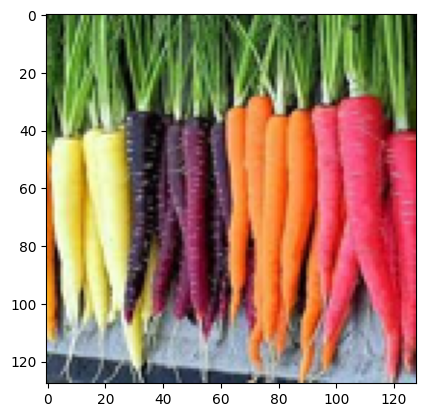

In [11]:
import matplotlib.pyplot as plt
from PIL import Image

# image=Image.open(r'test_data/img1.jpeg')
# image=Image.open(r'test_data/img2.jpeg')
# image=Image.open(r'test_data/img3.jpg')
# image=Image.open(r'test_data/img4.jpeg')
# image=Image.open(r'test_data/img5.jpg')
# image=Image.open(r'test_data/img6.jpg')
# image=Image.open(r'test_data/img7.jpeg')
image=Image.open(r'test_data/img8.jpeg')
# image=image.resize(128,128)
image=image.resize((128,128))
image_rgb = image.convert('RGB')
# Image._show(image)
plt.imshow(image)

In [17]:
from tensorflow.keras.models import load_model
import tensorflow as tf

model1=load_model(r'C:\Users\Administrator\Documents\Projects\foml_project\foml-project\backend\model4.keras')

# Convert RGBA image to RGB


In [18]:
import numpy as np

In [20]:
    # Define your class names in the same order as they were during training
class_names = ['FreshApple', 'FreshBanana', 'FreshCarrot',
    'FreshCucumber', 'FreshMango', 'FreshOrange', 'FreshPotato',
    'FreshStrawberry', 'FreshTomato', 'RottenApple', 'RottenBanana',
    'RottenCarrot', 'RottenCucumber', 'RottenMango',
    'RottenOrange', 'RottenPotato', 'RottenStrawberry', 'RottenTomato']


In [21]:
pred= model.predict(tf.expand_dims(tf.keras.preprocessing.image.img_to_array(image_rgb)/255,0))
predicted_class_index = np.argmax(pred[0])


predicted_class_name = class_names[predicted_class_index]
print(f"The predicted class is: {predicted_class_name}")
print(f"Prediction probabilities: {pred[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
The predicted class is: FreshCarrot
Prediction probabilities: [2.4016304e-08 7.7795638e-11 7.4617058e-01 4.2566519e-14 4.6102460e-09
 3.3717817e-10 6.5369562e-08 5.0417661e-06 2.0332092e-02 1.0606819e-06
 9.1895890e-07 1.7399579e-01 7.9608898e-12 2.6039968e-05 7.2278048e-08
 1.6880935e-07 5.8580142e-02 8.8803243e-04]


In [22]:
image_array = tf.keras.preprocessing.image.img_to_array(image_rgb) / 255.0
image_batch = tf.expand_dims(image_array, 0)
pred = model.predict(image_batch)
probabilities = pred[0]

# --- Modification to show all class predictions ---
class_probabilities = list(zip(class_names, probabilities))
sorted_class_probabilities = sorted(class_probabilities, key=lambda item: item[1], reverse=True)

# --- Print the sorted results ---
print("Predictions (sorted by confidence):")
for class_name, probability in sorted_class_probabilities:
    print(f"- {class_name}: {probability*100:.2f}%")

# --- Print the top prediction ---
top_predicted_class_name = sorted_class_probabilities[0][0]
top_probability = sorted_class_probabilities[0][1]
print(f"\nTop predicted class: {top_predicted_class_name} ({top_probability*100:.2f}%)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predictions (sorted by confidence):
- FreshCarrot: 74.62%
- RottenCarrot: 17.40%
- RottenStrawberry: 5.86%
- FreshTomato: 2.03%
- RottenTomato: 0.09%
- RottenMango: 0.00%
- FreshStrawberry: 0.00%
- RottenApple: 0.00%
- RottenBanana: 0.00%
- RottenPotato: 0.00%
- RottenOrange: 0.00%
- FreshPotato: 0.00%
- FreshApple: 0.00%
- FreshMango: 0.00%
- FreshOrange: 0.00%
- FreshBanana: 0.00%
- RottenCucumber: 0.00%
- FreshCucumber: 0.00%

Top predicted class: FreshCarrot (74.62%)


In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt

In [3]:

model = load_model(r"C:\Users\Administrator\Documents\Projects\foml_project\foml-project\ml\veg_fruit_classifier_mobilenetv2_128.keras")
print("Model loaded successfully!")

Model loaded successfully!


c:\Python\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 58 variables whereas the saved optimizer has 114 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [21]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide_2 (TrueDivide)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract_2 (Subtract)           │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 18)             │        23,058 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,165,542 (15.89 MB)

 Trainable params: 1,884,498 (7.19 MB)

 Non-trainable params: 396,544 (1.51 MB)

 Optimizer params: 1,884,500 (7.19 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


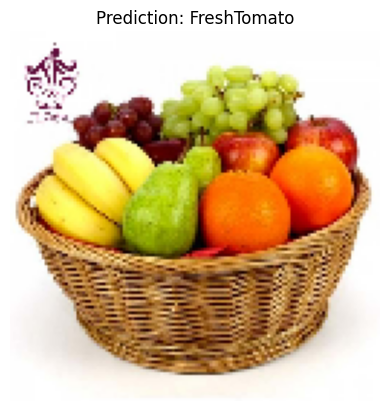

In [29]:
class_names = ['FreshApple', 'FreshBanana', 'FreshCarrot', 'FreshCucumber', 'FreshMango',
               'FreshOrange', 'FreshPotato', 'FreshStrawberry', 'FreshTomato',
               'RottenApple', 'RottenBanana', 'RottenCarrot', 'RottenCucumber',
               'RottenMango', 'RottenOrange', 'RottenPotato', 'RottenStrawberry', 'RottenTomato']

img_path = r'test_data\img10.jpg'
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # [0,255] raw pixels
pred = model.predict(img_array)  # model handles preprocessing internally



pred = model.predict(img_array)
pred_class = class_names[np.argmax(pred)]


plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {pred_class}")
plt.show()


In [43]:
import tensorflow_hub as hub
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

# --- Load TF Hub SSD MobileNet V2 detector ---
detector = hub.load("https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2")


In [ ]:
img_path = "test_data/img10.jpg"
img_raw = tf.io.read_file(img_path)
img = tf.image.decode_jpeg(img_raw, channels=3)
input_tensor = tf.expand_dims(img, 0)


detections = detector(input_tensor)

boxes = detections["detection_boxes"][0].numpy()
classes = detections["detection_classes"][0].numpy().astype(int)
scores = detections["detection_scores"][0].numpy()

img_np = img.numpy().copy()
h, w, _ = img_np.shape

for i in range(len(scores)):
    if scores[i] > 0.5:
        y1, x1, y2, x2 = boxes[i]
        p1 = (int(x1 * w), int(y1 * h))
        p2 = (int(x2 * w), int(y2 * h))
        cv2.rectangle(img_np, p1, p2, (255, 0, 0), 2)

plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(img_np, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


In [44]:
import tensorflow_hub as hub
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# --- Load models ---
detector = hub.load("https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2")
classifier = load_model("veg_fruit_classifier_mobilenetv2_128.keras")



c:\Python\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 58 variables whereas the saved optimizer has 114 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Box 0: (95, 130) → (390, 402)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
  → Predicted: FreshTomato (0.55)
Box 1: (95, 130) → (390, 402)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
  → Predicted: FreshTomato (0.75)


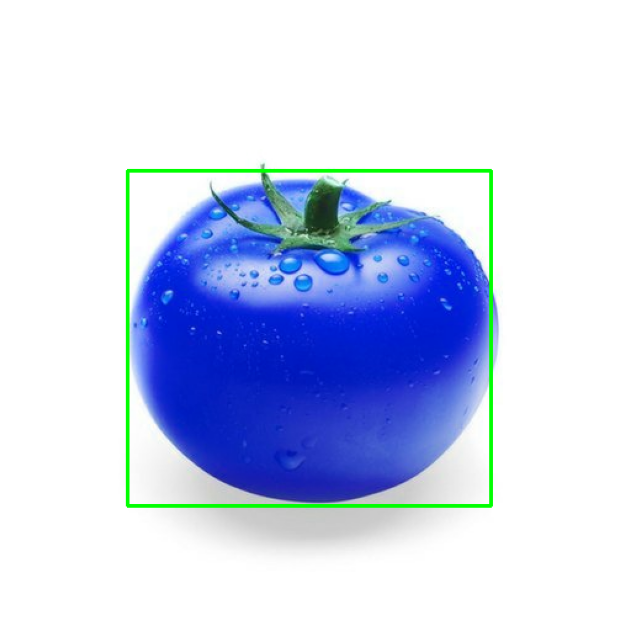

In [50]:
# --- Class labels (must match training order) ---
class_names = ['FreshApple', 'FreshBanana', 'FreshCarrot', 'FreshCucumber', 'FreshMango',
               'FreshOrange', 'FreshPotato', 'FreshStrawberry', 'FreshTomato',
               'RottenApple', 'RottenBanana', 'RottenCarrot', 'RottenCucumber',
               'RottenMango', 'RottenOrange', 'RottenPotato', 'RottenStrawberry', 'RottenTomato']

# --- Load image ---
img_path = "test_data/img6.jpg"
img_raw = tf.io.read_file(img_path)
img = tf.image.decode_jpeg(img_raw, channels=3)
input_tensor = tf.expand_dims(img, 0)

# --- Run detection ---
detections = detector(input_tensor)
boxes = detections["detection_boxes"][0].numpy()
scores = detections["detection_scores"][0].numpy()

# --- Convert to NumPy ---
img_np = img.numpy().copy()
h, w, _ = img_np.shape

# --- Process detections ---
for i in range(len(scores)):
    if scores[i] > 0.5:
        y1, x1, y2, x2 = boxes[i]
        (x1, y1, x2, y2) = (int(x1 * w), int(y1 * h), int(x2 * w), int(y2 * h))

        # Print coordinates
        print(f"Box {i}: ({x1}, {y1}) → ({x2}, {y2})")

        # Crop region
        crop = img_np[y1:y2, x1:x2]

        # Skip invalid small crops
        if crop.size == 0:
            continue

        # Prepare for classifier
        crop_resized = cv2.resize(crop, (128, 128))
        crop_array = np.expand_dims(crop_resized, axis=0)  # shape (1, 128, 128, 3)

        preds = classifier.predict(crop_array)
        label = class_names[np.argmax(preds)]
        confidence = np.max(preds)

        print(f"  → Predicted: {label} ({confidence:.2f})")

        # Draw results
        cv2.rectangle(img_np, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img_np, f"{label}", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

# --- Show final annotated image ---
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(img_np, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
